# Name: Raphael Kang'eri
# Reg_no: 21/04851
# Unit: Machine Learning
# Title: Image classification using Optical recognition of handwritten digits

In [21]:
# first of all import reqired library 
import numpy as np # numpy is a fundamental library for numerical computing in Python.
import pandas as pd #Pandas is a powerful library for data analysis and manipulation.
import matplotlib.pyplot as plt #Matplotlib is a library for creating various data visualizations like plots, charts, and histograms.

In [22]:
# import dataset, for this I will use a public dataset 
from sklearn.datasets import load_digits
digits=load_digits()
#scikit-learn library for machine learning tasks such as classification, regression, clustering, dimensionality reduction, and more
#datasets module within scikit-learn provides various built-in datasets for training and testing machine learning models.
#load_digits() function specifically is used to load the "Optical recognition of handwritten digits" dataset. 
#This dataset contains 1797 images of handwritten digits (0-9), each represented as an 8x8 pixel image.
#

In [23]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [24]:
digits.data.shape
#digits.data is a numpy array
#The first dimension (1797) represents the number of images in the dataset.
#The second dimension (64) represents the number of features per image
#Since each image is an 8x8 grayscale image, there are 64 pixels (8 * 8)

(1797, 64)

In [25]:

X=digits.data
X
#define a variable called X and assign array digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [26]:
# output label (y)
digits.target.shape
y=digits.target
y
#target represents the label. It is an integer value between 1 and 9

array([0, 1, 2, ..., 8, 9, 8])

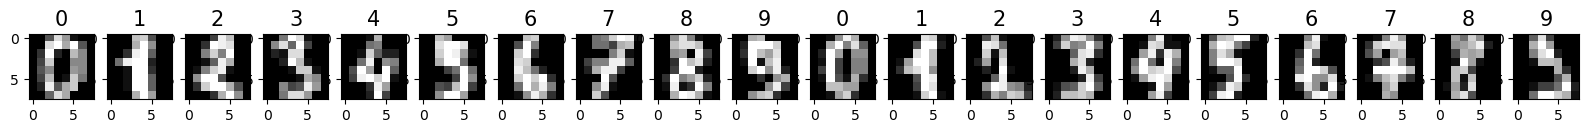

In [27]:
# lets display 
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:20], digits.target[0:20])):
    plt.subplot(1,20,index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title(label, fontsize=15)
    #plt is a matplotlib function
    #plt.figure creates a figure window to plot our objects
    #(20,4) sets the dimensions of the figure
    #index: This variable stores the index of the current iteration
    #(image, label): This is tuple unpacking. It unpacks each element of the sequence into the variables image and label.
    #for index, (image, label) creates a for loop that iterates over each element
    #in the sequence generated by the enumerate(zip(digits.data[0:20], digits.target[0:20]))
    #enumerate: This is a built-in function used to iterate over a sequence while also keeping track of the index of the current item.
    #zip: This is another built-in function used to combine elements from multiple sequences
    #enumerate(zip(digits.data[0:20], digits.target[0:20])) combines the first 20 images and labels into pairs and assigns an index to each pair.

In [28]:
#plt.subplot creates a subplot within the figure
#1,20 specifies a grid of 1 row and 20 columns.
#index+1 determines the position of the subplot within the grid (starting from 1).
#plt.imshow displays the image using the function
#np.reshape(image,(8,8)) reshapes the one-dimensional image array back to its original 8x8 format representing the digit
#cmap = plt.cm.gray sets the colormap to grayscale for visualizing the pixel intensities
#plt.title(label, fontsize=15) This line adds the title label

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# train_test_split is a function from sklearn.model_selection
#This function splits a dataset into training and testing sets
#X: This represents the feature/input data, which we assigned to the variable X earlier
#y: This represents the target variable, which we assigned to the variable y earlier
#test_size=0.2: This parameter specifies the proportion of the dataset to include in the test split
#Here, it's set to 0.2, meaning 20% of the data will be used for testing, and the remaining 80% will be used for training
#random_state=0: This parameter sets the random seed for reproducibility

In [30]:
# now lets see our splitting data
print("Train input data", X_train.shape)
print("Test input data", X_test.shape)
print("Train input data", y_train.shape)
print("Test input data", y_test.shape)
#X_train: The training features.
#X_test: The testing features.
#y_train: The training labels.
#y_test: The testing labels.


Train input data (1437, 64)
Test input data (360, 64)
Train input data (1437,)
Test input data (360,)


In [31]:
# now lets train our model(Logistic Regression classification)
from sklearn.linear_model import LogisticRegression
# lets define a fuction for this 
log_reg=LogisticRegression()
# fit the model 
log_reg.fit(X_train,y_train)
log_reg
#Logistic Regression is a machine learning algorithm used for classification problems, where the target variable has multiple discrete categories
#log_reg = LogisticRegression()
#This line creates an instance of the LogisticRegression class and assigns it to the variable log_reg
# log_reg.fit(X_train, y_train)trains the Logistic Regression model on the training data
#fit method takes these inputs and learns the internal parameters (weights and biases) of the model that best map the input features to the target labels

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# now lets predict
log_reg.predict(X_test[0:10])
predictions=log_reg.predict(X_test)
predictions
#log_reg.predict(X_test[0:10]):
#This line makes predictions on the first 10 images in the testing set
#.predict(): This is a method of the LogisticRegression class that takes input data and predicts the corresponding target labels

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [33]:
# accuracy prediction/testing/
score=log_reg.score(X_test,y_test)
print("The accuracy score is:",score)
#score method is a built-in method of the LogisticRegression class that takes the testing data as input and returns the accuracy score, which is the proportion of predictions that were correct.

The accuracy score is: 0.9666666666666667


In [34]:
# lets also find the confusion matrix
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
#These lines import the necessary libraries for calculating the confusion matrix.
cm=metrics.confusion_matrix(y_test, predictions) #X_test
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

Text(0.5, 1.0, 'Accuracy score:0.9666666666666667')

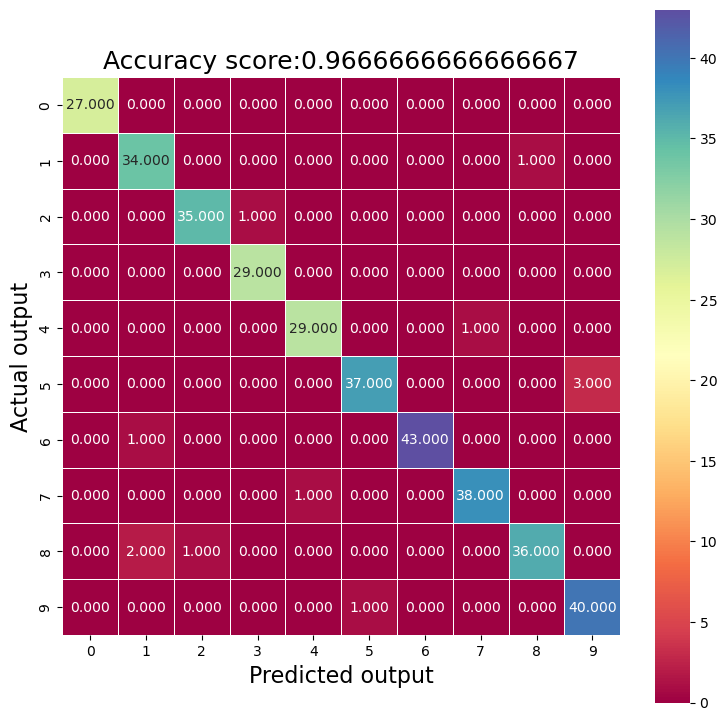

In [35]:
# lets make a graph to show the comparsion 
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidths=.5, square=True, cmap='Spectral');
plt.ylabel('Actual output',size=16)
plt.xlabel('Predicted output',size=16)
all_sample_title='Accuracy score:{0}'.format(score)
plt.title(all_sample_title, size=18)
#imports the seaborn library, which is a powerful visualization library built on top of Matplotlib
#plt.figure(figsize=(9,9))This line creates a new figure for plotting with a specific size
#sns.heatmap function that creates a heatmap visualization of the confusion matrix
#annot=True: This shows the numerical values within each cell of the heatmap.
#fmt='0.3f': This formats the numbers to display three decimal places
#linewidths=.5: This sets the thickness of the grid lines between cells to 0.5.
#square=True: This ensures the heatmap is displayed as a square.
#cmap='Spectral': This sets the colormap used for the heatmap to the "Spectral" color scheme
#

In [36]:
import numpy as np
import matplotlib.pyplot as plt
index=0
misclassifiedIndexes=[]
for label, predict in zip(y_test, predictions):
    if label !=predict:
        misclassifiedIndexes.append(index)
        index +=1
#index: This variable keeps track of the index of the current image in the dataset.        
#misclassified_indexes: This is an empty list that will store the indexes of misclassified images
#his loop iterates over the true labels (y_test) and the predicted labels (predictions) simultaneously. For each image:
#If the true label (label) is not equal to the predicted label (predict), the index of the image is appended to the misclassified_indexes list.
#The index variable is incremented to move on to the next image.

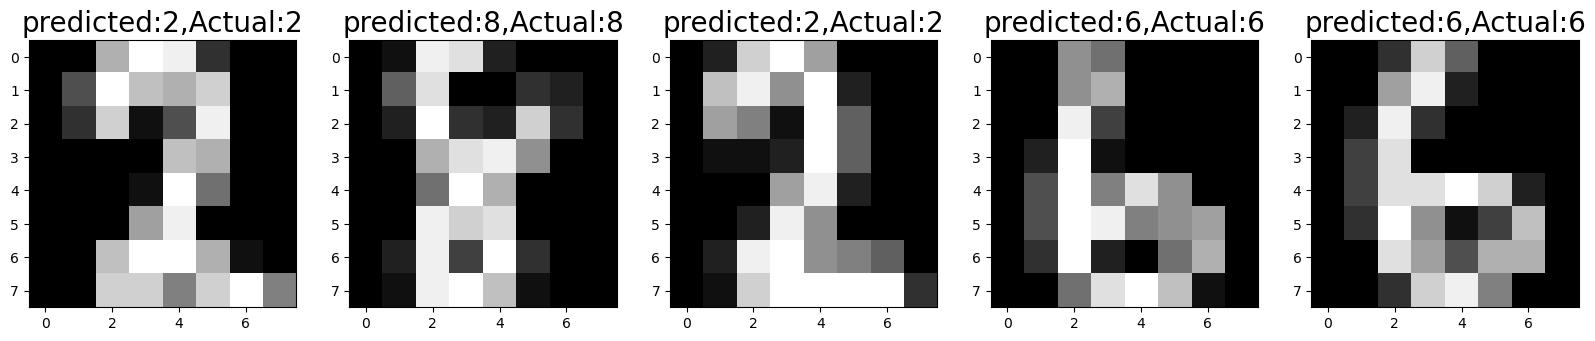

In [37]:
plt.figure(figsize=(20,4))
for plotIndex,badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1,5,plotIndex+1)
    plt.imshow(np.reshape(X_test[badIndex],(8,8)),cmap=plt.cm.gray)
    plt.title("predicted:{},Actual:{}".format(predictions[badIndex],y_test[badIndex]),fontsize=20)

#enumerate returns both the index (plotIndex) and the value (badIndex) of each item in the misclassifiedIndexes list.
#plotIndex+1 determines the position of the subplot within the grid (starting from 1).

#Overall, this code snippet visualizes the first 5 misclassified images from the testing set, 
#along with their predicted and actual labels, to help you understand where the model made mistakes and potentially improve its performance.
#X_test[badIndex] accesses the misclassified image's data using its index.
#np.reshape(..., (8, 8)) reshapes the 1D array of pixel intensities back to its original 8x8 image format